# L12 Time series simulations

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")


In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
output = dirname + "da_case_studies/ch02-football-manager-success/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:
# Import the prewritten helper functions
from py_helper_functions import *


### PART 1

Random walk simulation

Generate k random walks across time {0, 1, ... , T}


In [4]:
T = 100  # number of obs
k = 5  # nr of random walks generated

Define function for generating a random walk series

In [5]:
def random_walk(initial_value: float, T: int, seed=None) -> np.array:
    """
    Generate random walk series of T length.

       Parameters
    ----------
    initial_value : float

    T : int
        Length of the random walk series
    seed : bool or int, defalt=None
        Set seed to get the same series.
        For reproducibility.
    """
    rng = np.random.default_rng(seed)
    return initial_value + np.insert(np.cumsum(rng.normal(0, 1, T - 1)), 0, 0)

Each random walk starts from 0

In [6]:
initial_value = 0

In [7]:
rws = (
    pd.DataFrame(
        [
            random_walk(initial_value, T, seed=i) for i in range(k)
        ],  # set seed=None here if you want a different result
        index=[f"V{i+1}" for i in range(k)],
        columns=[i for i in range(1, T + 1)],
    )
    .T.reset_index()
    .rename(columns={"index": "time"})
)
rws

,time,V1,V2,V3,V4,V5
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0.125730,0.345584,0.189053,2.040919,-0.651791
2,3,-0.006375,1.167202,-0.333695,-0.514746,-0.826508
3,4,0.634048,1.497639,-0.746759,-0.096647,0.837216
4,5,0.738948,0.194482,-3.188226,-0.664417,1.496363
...,...,...,...,...,...,...
95,96,10.245475,-3.912167,1.747275,-6.628912,-8.266740
96,97,11.276929,-6.163022,1.794679,-8.358926,-8.113720
97,98,11.437938,-6.301677,1.359994,-8.363340,-7.948482
98,99,10.852409,-6.268677,0.657106,-7.149776,-6.811047


Melt dataframe for plotnine

In [8]:
rws = rws.melt(id_vars="time")

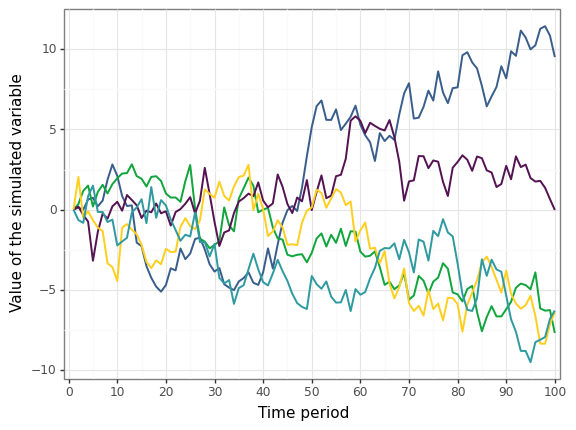

<ggplot: (8768041561301)>

In [9]:
(
    ggplot(rws, aes("time", "value", color="variable"))
    + geom_line(show_legend=False, size=0.8)
    + theme_bw()
    + scale_color_manual(values=(color[0], color[1], color[2], color[3], color[4]))
    + labs(x="Time period", y="Value of the simulated variable")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 100), breaks=seq(0, 100, 10))
)


### PART 2

Serially uncorrelated vs serially correlated series

Simulation exercies:
  1. generate white noises (uncorrelated series)
  2. generate serially correlated series with rho=0.8 from white noise

In [10]:
rng = np.random.default_rng(1000)

white_noise = rng.normal(0, 1, T)

rho = 0.8
serially_correlated = np.zeros(T)
serially_correlated[0] = white_noise[0]

for i in range(1, len(serially_correlated)):
    serially_correlated[i] = rho * serially_correlated[i - 1] + white_noise[i]

In [11]:
series_simulation_data = pd.DataFrame(
    [white_noise, serially_correlated],
    index=["white_noise", "corr_08"],
).T
series_simulation_data["time"] = series_simulation_data.index + 1
series_simulation_data

,white_noise,corr_08,time
0,-0.321330,-0.321330,1
1,-0.485661,-0.742726,2
2,1.680058,1.085878,3
3,1.970527,2.839229,4
4,0.155184,2.426567,5
...,...,...,...
95,-0.168728,-2.728617,96
96,-0.495815,-2.678709,97
97,1.262406,-0.880561,98
98,-1.567089,-2.271538,99


Whitenoise

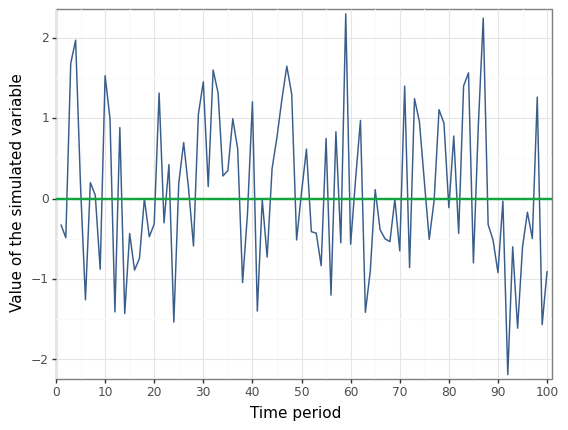

<ggplot: (8768041650129)>

In [12]:
(
    ggplot(series_simulation_data, aes("time", "white_noise"))
    + geom_line(show_legend=False, size=0.6, color=color[0])
    + geom_hline(yintercept=0, color=color[1], size=1)
    + labs(x="Time period", y="Value of the simulated variable")
    + theme_bw()
    + scale_y_continuous(expand=(0.01, 0.01))
    + scale_x_continuous(expand=(0.01, 0.01), breaks=seq(0, 100, 10))
)


Serially correlated series, rho=0.8

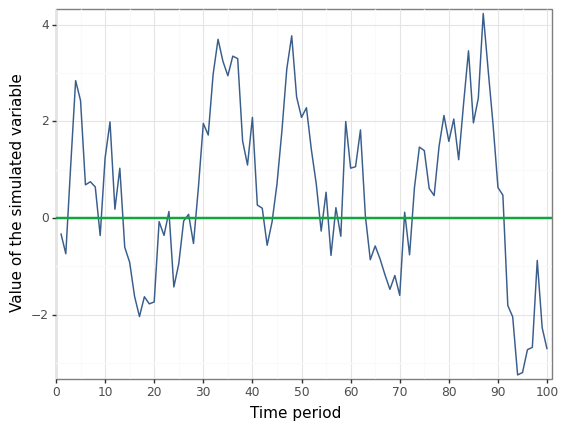

<ggplot: (8768041650041)>

In [13]:
(
    ggplot(series_simulation_data, aes(x="time", y="corr_08"))
    + geom_line(show_legend=False, size=0.6, color=color[0])
    + geom_hline(yintercept=0, color=color[1], size=1)
    + labs(x="Time period", y="Value of the simulated variable")
    + theme_bw()
    + scale_y_continuous(expand=(0.01, 0.01))
    + scale_x_continuous(expand=(0.01, 0.01), breaks=seq(0, 100, 10))
)

Two series on one plot -  not in book

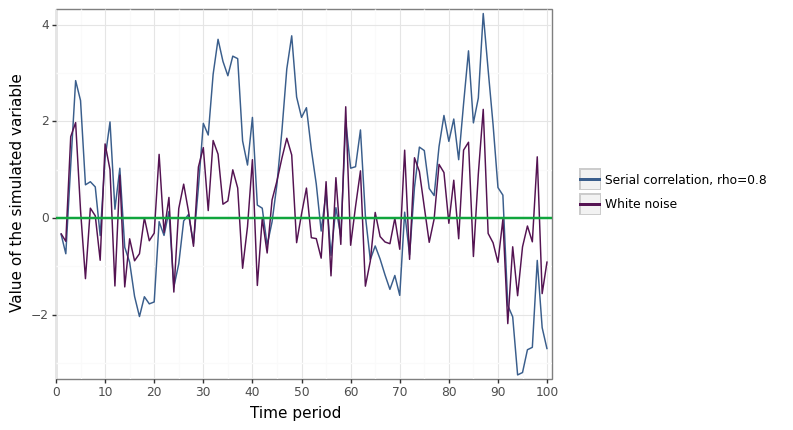

<ggplot: (8768092788989)>

In [14]:
(
    ggplot(
        series_simulation_data.melt(id_vars="time"),
        aes(x="time", y="value", color="variable"),
    )
    + geom_line(size=0.6)
    + geom_hline(yintercept=0, color=color[1], size=1)
    + labs(x="Time period", y="Value of the simulated variable")
    + scale_color_manual(
        values=(color[0], color[2]),
        labels=(f"Serial correlation, rho={rho}", "White noise"),
    )
    + scale_y_continuous(expand=(0.01, 0.01))
    + scale_x_continuous(expand=(0.01, 0.01), breaks=seq(0, 100, 10))
    + theme_bw()
    + theme(legend_title=element_blank())
)